In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | pangai
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | alta floresta
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | san juan
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | labuhan
Processing Record 21 of Set 1 | lolua
City not found. Skipping...
Processing Record 22 of Set 1 | br

Processing Record 40 of Set 4 | marawi
Processing Record 41 of Set 4 | marystown
Processing Record 42 of Set 4 | port pirie
Processing Record 43 of Set 4 | toccoa
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | fort frances
Processing Record 46 of Set 4 | korla
Processing Record 47 of Set 4 | tondano
Processing Record 48 of Set 4 | mahon
Processing Record 49 of Set 4 | khandagayty
Processing Record 50 of Set 4 | evansville
Processing Record 1 of Set 5 | marathopolis
City not found. Skipping...
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 5 of Set 5 | maham
Processing Record 6 of Set 5 | meyungs
City not found. Skipping...
Processing Record 7 of Set 5 | vestmannaeyjar
Processing Record 8 of Set 5 | tessalit
Processing Record 9 of Set 5 | blovice
Processing Record 10 of Set 5 | aksehir
Processing Record 11 of Set 5 | memari
Processing Record 

Processing Record 28 of Set 8 | tura
Processing Record 29 of Set 8 | mersing
Processing Record 30 of Set 8 | paracuru
Processing Record 31 of Set 8 | jumla
Processing Record 32 of Set 8 | burnie
Processing Record 33 of Set 8 | elko
Processing Record 34 of Set 8 | laukaa
Processing Record 35 of Set 8 | mezhdurechensk
Processing Record 36 of Set 8 | dryden
Processing Record 37 of Set 8 | ilulissat
Processing Record 38 of Set 8 | sitka
Processing Record 39 of Set 8 | krasnyy chikoy
Processing Record 40 of Set 8 | canico
Processing Record 41 of Set 8 | emba
Processing Record 42 of Set 8 | ongandjera
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | salalah
Processing Record 45 of Set 8 | margate
Processing Record 46 of Set 8 | tuatapere
Processing Record 47 of Set 8 | amahai
Processing Record 48 of Set 8 | batagay-alyta
Processing Record 49 of Set 8 | port hardy
Processing Record 50 of Set 8 | miyako
Processing Record 1 of Set 9 | bojnurd
Processing Record 2 of

Processing Record 18 of Set 12 | sioux lookout
Processing Record 19 of Set 12 | zacatecoluca
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | viligili
City not found. Skipping...
Processing Record 22 of Set 12 | warqla
City not found. Skipping...
Processing Record 23 of Set 12 | kalakamati
Processing Record 24 of Set 12 | kajaani
Processing Record 25 of Set 12 | calama
Processing Record 26 of Set 12 | itzican
City not found. Skipping...
Processing Record 27 of Set 12 | hirado
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | kainantu
Processing Record 30 of Set 12 | bargal
City not found. Skipping...
Processing Record 31 of Set 12 | yenotayevka
Processing Record 32 of Set 12 | bridlington
Processing Record 33 of Set 12 | concordia
Processing Record 34 of Set 12 | marienburg
Processing Record 35 of Set 12 | road town
Processing Record 36 of Set 12 | melo
Processing Record 37 of Set 12 | nago
Processing Record 38 of Set 12 | ewa beach

In [19]:
len(city_data)

568

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,84.27,58,0,20.71,AU,2021-11-29 02:59:07
1,Hithadhoo,-0.6000,73.0833,81.79,75,39,17.78,MV,2021-11-29 02:59:08
2,Albany,42.6001,-73.9662,27.21,96,92,1.59,US,2021-11-29 02:58:19
3,Pangai,-19.8000,-174.3500,82.51,54,20,18.41,TO,2021-11-29 02:59:08
4,Kapaa,22.0752,-159.3190,80.58,72,84,16.08,US,2021-11-29 02:59:09
5,Alta Floresta,-9.8756,-56.0861,72.21,94,90,2.04,BR,2021-11-29 02:59:09
6,San Cristobal,7.7669,-72.2250,66.22,94,35,1.36,VE,2021-11-29 02:59:10
7,San Juan,-31.5375,-68.5364,71.60,23,0,6.26,AR,2021-11-29 02:56:38
8,Cidreira,-30.1811,-50.2056,70.65,90,100,12.44,BR,2021-11-29 02:59:10
9,Airai,-8.9266,125.4092,73.87,63,100,0.92,TL,2021-11-29 02:59:10


In [22]:
#Reorder the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2021-11-29 02:59:07,-24.8667,113.6333,84.27,58,0,20.71
1,Hithadhoo,MV,2021-11-29 02:59:08,-0.6000,73.0833,81.79,75,39,17.78
2,Albany,US,2021-11-29 02:58:19,42.6001,-73.9662,27.21,96,92,1.59
3,Pangai,TO,2021-11-29 02:59:08,-19.8000,-174.3500,82.51,54,20,18.41
4,Kapaa,US,2021-11-29 02:59:09,22.0752,-159.3190,80.58,72,84,16.08
5,Alta Floresta,BR,2021-11-29 02:59:09,-9.8756,-56.0861,72.21,94,90,2.04
6,San Cristobal,VE,2021-11-29 02:59:10,7.7669,-72.2250,66.22,94,35,1.36
7,San Juan,AR,2021-11-29 02:56:38,-31.5375,-68.5364,71.60,23,0,6.26
8,Cidreira,BR,2021-11-29 02:59:10,-30.1811,-50.2056,70.65,90,100,12.44
9,Airai,TL,2021-11-29 02:59:10,-8.9266,125.4092,73.87,63,100,0.92


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1638247193.1016672

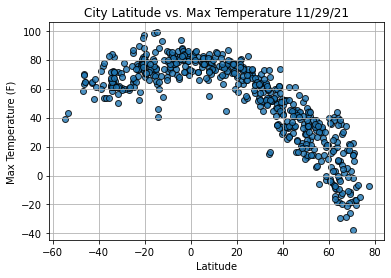

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

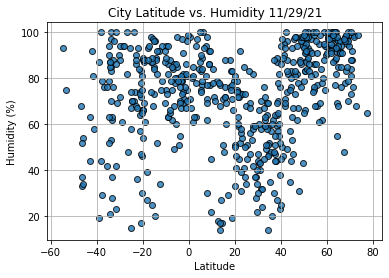

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

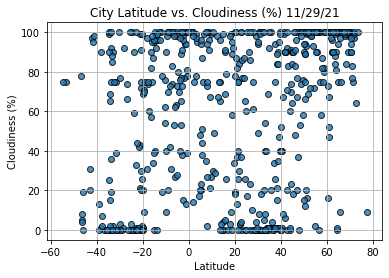

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

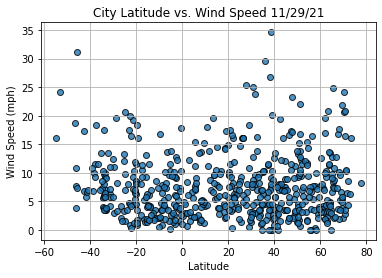

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2021-11-29 02:58:19,42.6001,-73.9662,27.21,96,92,1.59
4,Kapaa,US,2021-11-29 02:59:09,22.0752,-159.3190,80.58,72,84,16.08
6,San Cristobal,VE,2021-11-29 02:59:10,7.7669,-72.2250,66.22,94,35,1.36
10,Qaanaaq,GL,2021-11-29 02:59:11,77.4840,-69.3632,-7.10,65,9,8.25
12,Barrow,US,2021-11-29 02:59:12,71.2906,-156.7887,-16.58,76,75,10.36


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

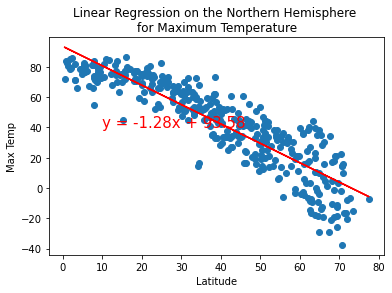

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

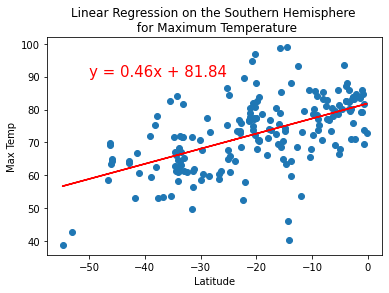

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

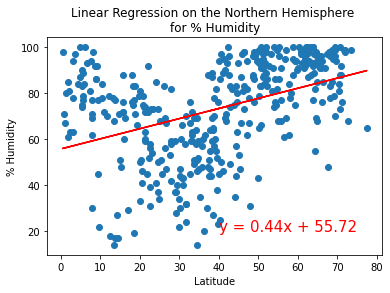

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,20))

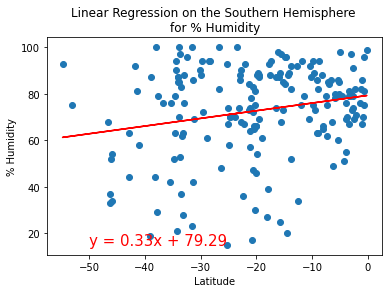

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

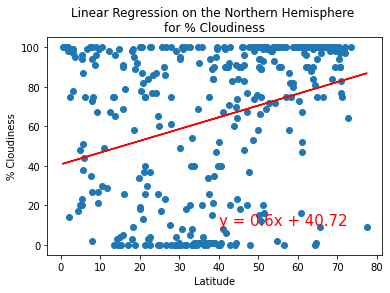

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

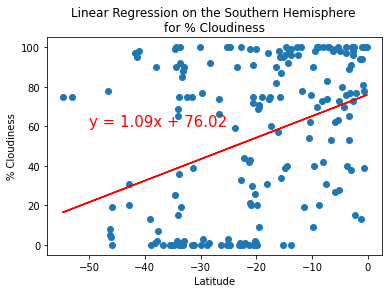

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

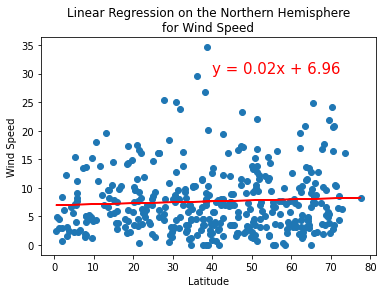

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,30))

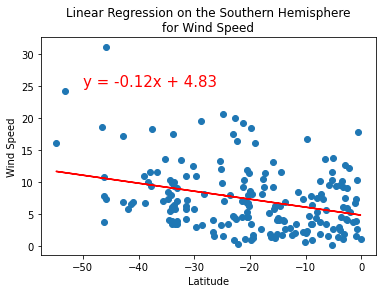

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,25))